This tutorial is based on the book by Sung-Phil Kim
<img src="kalman_big_picture.png" width=50%>

Let's consider very simple model:
$$
\begin{align*}
y_{t+1} &= y_{t} \\
x_t &= y_t + \nu_t \\
y_0 &= 14 \\
\nu_t &\sim N(0,2^2)
\end{align*}
$$
The covaraince matricies for noise are given by
$$Q =0, R=4 $$

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg 
%matplotlib inline

In [30]:
## make measurements
dt = 0.5
t  = np.arange(0, 50, dt)

xm = np.zeros([len(t)], dtype=np.float32)

# get volt function
def get_volt(k=1):
    w = 0. + 4. *np.random.rand()
    z = 14.4 + w
    
    return z

for k in range(len(t)):
    xm[k] = get_volt(k)

In [31]:
class kalman_filter(object):
    def __init__(self, y0, P, A=np.ones(1), B=np.ones(1), Q=np.zeros(1), R=4*np.ones(1)):
        self.y=y0
        self.A=A
        self.B=B
        self.Q=Q
        self.R=R
        self.P=P
        
    def simple_kalman(self, x):
        yp      = np.dot(self.A, self.y)

        Pp      = np.dot( np.dot(self.A, self.P), self.A.transpose()) + self.Q
        
#         print(self.B, Pp)
        
        temp    = linalg.pinv( np.atleast_2d( np.dot( np.dot(self.B, Pp), self.B.transpose()) + self.R ) )
        K       = np.dot( np.dot(Pp, self.B.transpose()), temp)
        
        self.y  = yp + np.dot(K, x-np.dot(self.B, yp))
        self.P  = Pp - np.dot(np.dot(K,self.B), Pp)
        
#         print(temp, K, self.y, self.P, Pp)
#         return self.y      
        return self.y, self.P, K

In [32]:
## test
f = kalman_filter(y0=14, P=6*np.ones(1))
kalman = np.zeros([len(t)])
P = np.zeros([len(t)])
K = np.zeros([len(t)])

for i in range(len(t)):
    kalman[i], P[i], K[i] = f.simple_kalman(xm[i])

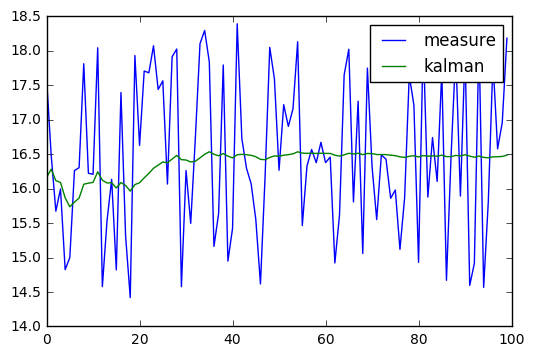

In [34]:
plt.hold('on')
plt.plot(xm)
plt.plot(kalman)
plt.legend(['measure','kalman'])

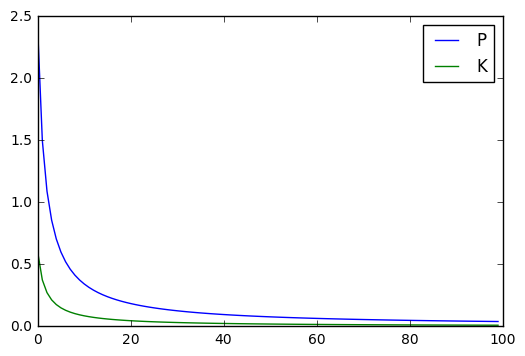

In [35]:
plt.hold('on')
plt.plot(P)
plt.plot(K)
plt.legend(['P','K'])

## Estimate velocity via position measurements
Our system model is
$$
y_{t+1} = Ay_t + w_t \\
x_t = By_t + \nu_t \\
A=[1,\Delta t; 0, 1]\\
B=[1,0] \\
y=[position; velocity]
$$

In [106]:
## make measurements
dt = 0.1
t  = np.arange(0, 10, dt)

xm = np.zeros([len(t)], dtype=np.float32)
pos_true = np.zeros([len(t)])
vel_true = np.zeros([len(t)])

dt=0.1
v_init=80

y1 = 0
y2 = 80

for k in range(len(t)):
    w  = 0 + 10*np.random.normal(0,1)
    nu = 0 + 10*np.random.normal(0,1)
    
    y1 = y1 + y2*dt
    y2 = 80 + w
    
    xm[k]  = 0 + y1 + nu
    
    pos_true[k] = xm[k] - nu
    vel_true[k] = y2

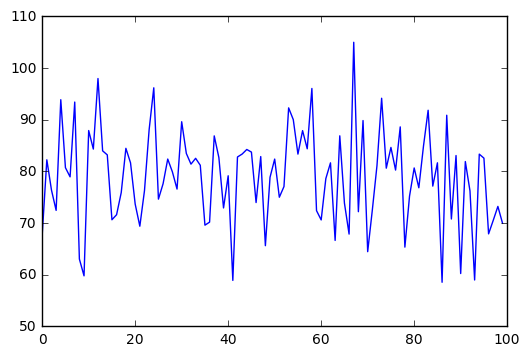

In [107]:
plt.plot(vel_true)

In [108]:
## test
A=np.array([[1,0.1],[0,1]])
B=np.array([[1,0]])
Q=np.array([[1,0],[0,3]])
R=10*np.ones([1])

# initial state and initial P
y0=np.array([[0],[0]])
P =np.array([[5,0],[0,5]])

f = kalman_filter(y0=y0, P=P, A=A, B=B, Q=Q, R=R)

kalman = np.zeros([2, len(t)])
P = np.zeros([len(t)])
K = np.zeros([len(t)])
pos = np.zeros([len(t)])
vel = np.zeros([len(t)])

for i in range(len(t)):
#     kalman[:, i] = f.simple_kalman(xm[i])
    tt, tt1, tt2 = f.simple_kalman(xm[i])
    pos[i] = tt[0]
    vel[i] = tt[1]

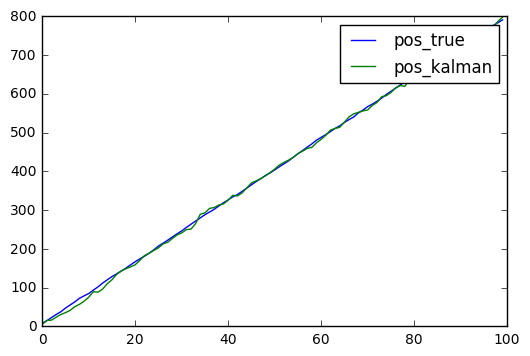

In [109]:
plt.hold('on')
plt.plot(pos_true)
plt.plot(pos)
plt.legend(['pos_true','pos_kalman'])

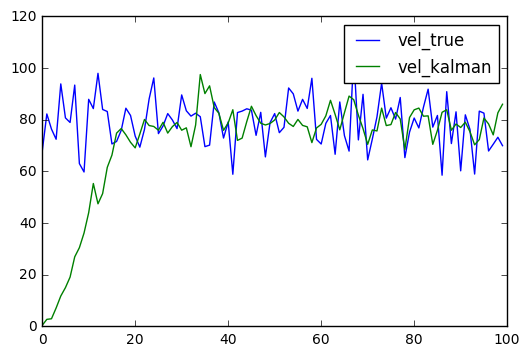

In [110]:
plt.hold('on')
plt.plot(vel_true)
plt.plot(vel)
plt.legend(['vel_true','vel_kalman'])